<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


> ### Problema: 
1. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

2. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

Organizar las gráficas [multiples plot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)



3. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
 
for i in range(0, Np): 
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000) 
  xf[i] = x_i
```


4. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```


5. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. La respuesta no es inmediata, constulta algunas fuentes para sacar tu propia conclusión.



In [ ]:
import numpy as np


In [ ]:
def f(x):
  return r*x*(1-x)


In [ ]:
#Version con listas
r=1
xn=0.5
N=10
X=[0.5]
for i in range(0,N-1):
  x=f(xn)
  xn=x
  X.append(x)
print(X)

[0.5, 0.25, 0.1875, 0.15234375, 0.1291351318359375, 0.11245924956165254, 0.09981216674968249, 0.08984969811841606, 0.08177672986644556, 0.07508929631879595]


In [17]:
#version con arreglos 
r=1
xn=0.5
N=10
X= np.zeros(N)
for i in range(0,N):
  x=f(xn)
  xn=x
  X[i]=x
print(X)

[0.79572761 0.79498331 0.79458962 0.79438235 0.79427349 0.79421639
 0.79418647 0.79417078 0.79416257 0.79415827]


In [18]:
#FUCNIONc
xn=0.5
N=10
X= np.zeros(N)
for i in range(0,N):
  x=f(xn)
  xn=x
  X[i]=x
print(X)

[0.79572761 0.79498331 0.79458962 0.79438235 0.79427349 0.79421639
 0.79418647 0.79417078 0.79416257 0.79415827]


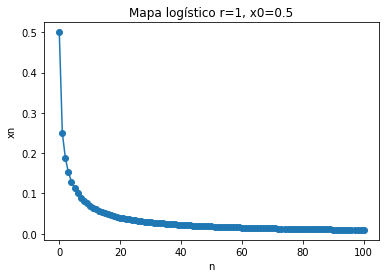

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Primer punto tomando r=1, x0=0.5 y N+100.

def logistic_map(x, r):
    return r * x * (1 - x)

# Parámetros
r = 1
x0 = 0.5
N = 100

# Generar secuencia de puntos
x = np.zeros(N+1)
x[0] = x0
for i in range(N):
    x[i+1] = logistic_map(x[i], r)

# Graficar resultados
plt.plot(np.arange(N+1), x, 'o-')
plt.xlabel('n')
plt.ylabel('xn')
plt.title(f'Mapa logístico r={r}, x0={x0}')
plt.show()


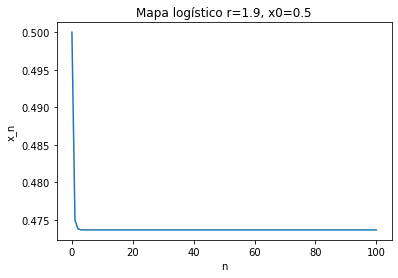

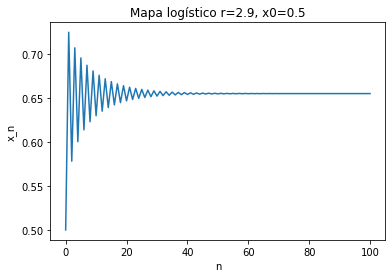

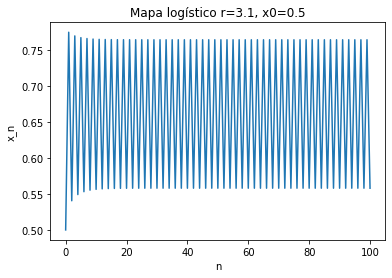

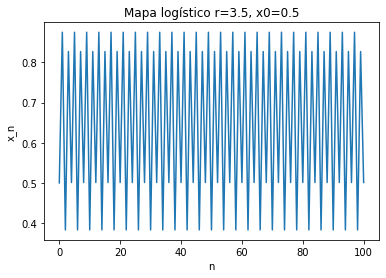

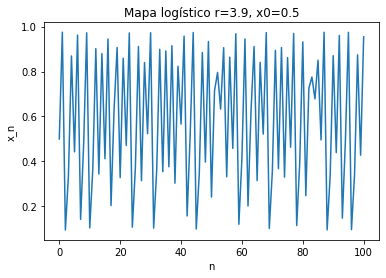

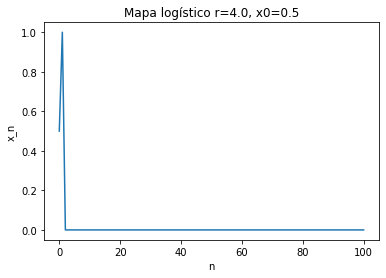

In [20]:
#2do punto


def logistic_map(x, r):
    return r * x * (1 - x)

# Parámetros
r = np.array([1.9, 2.9, 3.1, 3.5, 3.9, 4.0])
x0 = 0.5
N = 100

# Generar secuencia de puntos para cada valor de r y graficar
for i in range(len(r)):
    # Generar secuencia de puntos
    x_vals = np.zeros(N+1)
    x_vals[0] = x0
    for j in range(N):
        x_vals[j+1] = logistic_map(x_vals[j], r[i])

    # Graficar resultados
    plt.plot(np.arange(N+1), x_vals)
    plt.xlabel('n')
    plt.ylabel('x_n')
    plt.title(f'Mapa logístico r={r[i]}, x0={x0}')
    plt.show()


In [23]:
#Punto 3
#definimos la funcion 
def logist_map(r, xi, N):
    x = xi
    for i in range(N):
        x = r * x * (1 - x)
    return x

Np = 1000
xf = np.zeros(Np)
r = np.linspace(2.5, 4, Np)

#definimos un ciclo para crear la grafica
for i in range(0, Np):
    xini = np.random.random() #Usamos la funcion np.random para generar datos aleatorios de xini para ver el comportamiento de r vs x.
    x_i = logist_map(r=r[i], xi=xini, N=1000)
    xf[i] = x_i


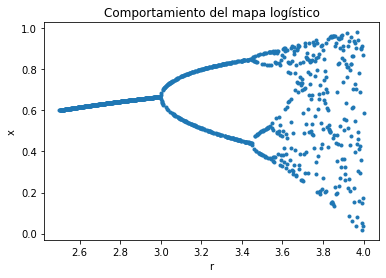

In [24]:
#imprimimos la grafica
plt.plot(r, xf, '.')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Comportamiento del mapa logístico')
plt.show()


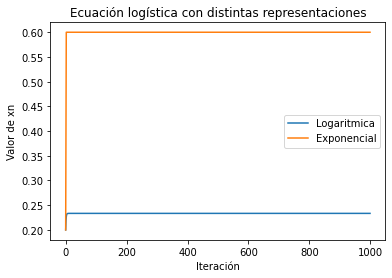

In [36]:
#Punto 4 Usemos  la funcion logistica inversa
#Hay que definir una nueva cosntante C que va a representar el limite de crecimiento poblacional
C=1
def logistic_map_log(x, a, b):
  return C / (a + b*np.log(1/x-1))


def logistic_map_exp(x, a):
    return a*x*(1-x)

# Parámetros
a = 2.5
b = 1.5
n = 1000

# Valores iniciales
x0 = 0.2

# Arreglos para almacenar los valores calculados
xn_log = np.zeros(n)
xn_exp = np.zeros(n)

# Cálculo de los valores utilizando las funciones trigonométricas
xn_log[0] = x0
for i in range(n-1):
    xn_log[i+1] = logistic_map_log(xn_log[i], a, b)

# Cálculo de los valores utilizando la exponencial
xn_exp[0] = x0
for i in range(n-1):
    xn_exp[i+1] = logistic_map_exp(xn_exp[i], a)

# Gráfica de las dos representaciones
plt.plot(range(n), xn_log, label='Logaritmica')
plt.plot(range(n), xn_exp, label='Exponencial')
plt.xlabel('Iteración')
plt.ylabel('Valor de xn')
plt.title('Ecuación logística con distintas representaciones')
plt.legend()
plt.show()




Para este punto se uso la representacion inversa de la funcion logistica la cual se hace con logaritmos. Debido a que la funcion inicial es una funcion exponensial. Esta funcion es muy importante si se quiere tener en cuenta la capacidad maxima de crecimiento esto es muy util por ejemplo para el control poblacional. Como se observan en los graficos tienen comportamientos similares pero varian siendo la funcion logaritmica la que se estabiliza mucho antes esto debido a que se le agrega una nueva constante C que reperesenta la capacidad maxima de crecimiento lo cual es por decirle de otra manera un limite al crecimiento de la funcion. 

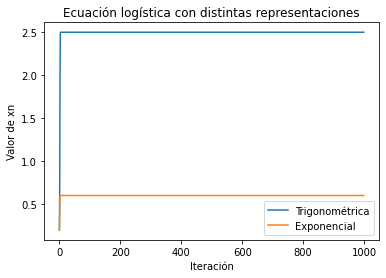

In [28]:
#Ahora usemos la funcion Tanh para definir la ecuacion logistica
def logistic_map_trig(x, a, b):
    return a*np.tanh(b*x)

def logistic_map_exp(x, a):
    return a*x*(1-x)

# Parámetros
a = 2.5
b = 1.5
n = 1000

# Valores iniciales
x0 = 0.2

# Arreglos para almacenar los valores calculados
xn_trig = np.zeros(n)
xn_exp = np.zeros(n)

# Cálculo de los valores utilizando las funciones trigonométricas
xn_trig[0] = x0
for i in range(n-1):
    xn_trig[i+1] = logistic_map_trig(xn_trig[i], a, b)

# Cálculo de los valores utilizando la exponencial
xn_exp[0] = x0
for i in range(n-1):
    xn_exp[i+1] = logistic_map_exp(xn_exp[i], a)

# Gráfica de las dos representaciones
plt.plot(range(n), xn_trig, label='Trigonométrica')
plt.plot(range(n), xn_exp, label='Exponencial')
plt.xlabel('Iteración')
plt.ylabel('Valor de xn')
plt.title('Ecuación logística con distintas representaciones')
plt.legend()
plt.show()




Similarmente a la funcion logistica inversa en este caso la funcion logsitica definida con la tangente hiperbolica es muy usada en el campo de la fisica y la ingenieria, la grafica igual que en el anterior punto tiene un comportamiento  muy parecido pero la de la $tan(h)$ tiene unas nuevas constantes que se usan para ajustar el comprotamiento de crecimiento de la funcion asi la forma estandar de la ecuacion es $y = (A/2) * tanh(B(x-C)) + D$ Supongamos como ejemplo que queremos modelar el crecimeinto de una onda electromagnetica en este caso las cosntantes de la funcion representarian lo siguiente. 

$y$: es la amplitud de la onda en la posición x.

$x$: es la posición en la guía de onda.

$A$: es la amplitud máxima de la onda.

$B$: es un parámetro relacionado con la frecuencia de la onda.

$C$: es un parámetro relacionado con la longitud de onda de la onda.

$D$: es un parámetro relacionado con la altura de la guía de onda.


Son estas constantes la que hacen que las graficas sean dinstintas ya que son parametros que se agregan para controlar el crecimiento de la funcion logistica. 

2.0 El algoritmo de gradiente descendente permite encontrar el minimo de funciones en espacios multidimensionales proponiendo puntos en la direccion en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}




Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual 
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función 


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo. 



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función. 
Prueba tu algoritmo para  la función $f(x) = x^2$

2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.
  

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)


In [38]:
#Este punto lo trabaje junto a la companera Sofia Casallas.


In [39]:
#1
import random

#La función gradiente descrita se realiza con numeros enteros del 1 al 10
def gradiente(f, df):
  w0 = random.randint(1, 10)
  N = 1000
  alpha = 1
  w = w0
  w_min = 100000
  for i in range(N):
    w_i = w - (alpha * df(w))
    if w_i > w_min:
      return w_i
    w = w_i
  return w

f = lambda x: x**2
df = lambda x: 2*x

w_min = gradiente(f, df)
print("El valor mínimo de f(x)=x^2 es",f(w_min),"en", w_min)

El valor mínimo de f(x)=x^2 es 81 en 9


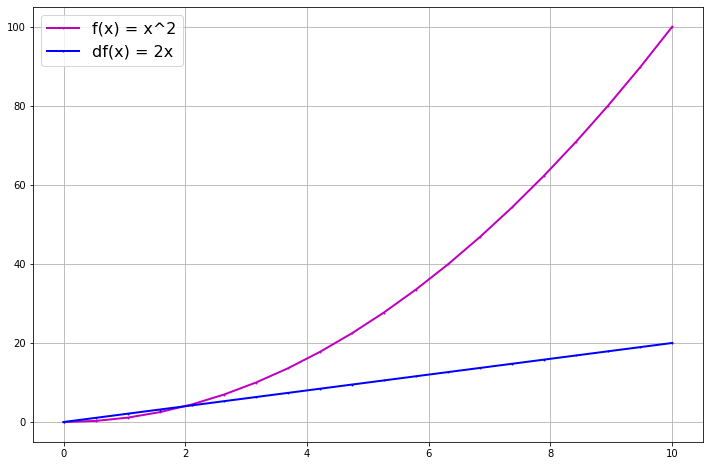

In [41]:
#2
x=np.linspace(0,10,20)
plt.figure(figsize=(12, 8))
plt.plot(x,f(x),"m.-", markersize = 2.0, linewidth = 2.0, label="f(x) = x^2")
plt.plot(x,df(x),  "b.-", markersize = 2.0, linewidth = 2.0, label="df(x) = 2x")
plt.legend(fontsize=16)
plt.grid()
plt.show()    

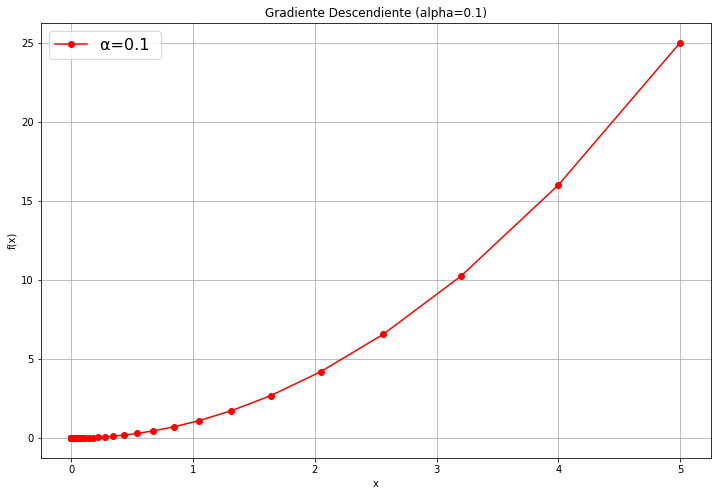

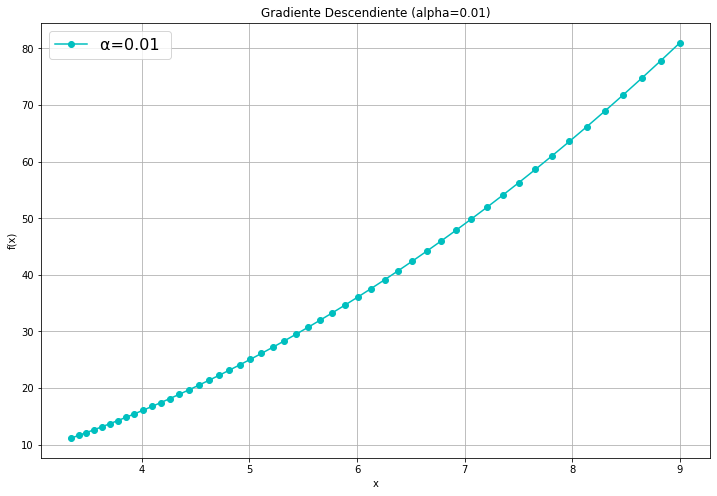

In [40]:
#3
def gradiente_descendiente(f, df, alpha):
  x = random.randint(1, 10)
  N = 50
  f_v = []
  x_v = []
  for i in range(N):
    f_val = f(x)
    f_v.append(f_val)
    x_v.append(x)
    x = x - alpha * df(x)
  return x, f_v, x_v

f = lambda x: x**2
df = lambda x: 2*x

alpha = 0.1
x_min, f_v, x_v= gradiente_descendiente(f, df, alpha)
x_v = np.array(x_v)
f_v = np.array(f_v)
plt.figure(figsize=(12, 8))
plt.plot(x_v, f_v, '-o', label="α=0.1 ", color='r') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gradiente Descendiente (alpha={alpha})')
plt.legend(fontsize=16)
plt.grid()
plt.show()

alpha = 0.01
x_min, f_v, x_v = gradiente_descendiente(f, df, alpha)
x_v = np.array(x_v)
f_v = np.array(f_v)
plt.figure(figsize=(12, 8))
plt.plot(x_v, f_v, '-o', label="α=0.01 ",color='c')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gradiente Descendiente (alpha={alpha})')
plt.legend(fontsize=16)
plt.grid()
plt.show()

De aqui en adelante fue trabajo de la clase de taller en la cual se trabajo el taller 03.


In [ ]:
import numpy as np
import matplotlib.pylab as plt


In [ ]:
#Graficar f(x)
x=np.linspace(0,2*np.pi,50)
f= lambda x: x**2*np.sin(x)+np.cos(x)**3


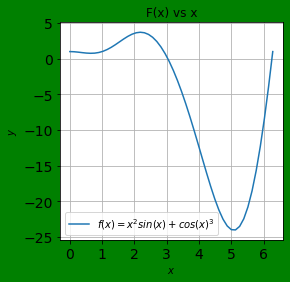

In [ ]:
plt.figure(figsize=(4,4),facecolor='g')
plt.plot(x,f(x),label='$f(x)=x^2sin(x)+cos(x)^3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('F(x) vs x')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc=3)
plt.show()

In [ ]:
b0=np.array([11,23,32,44,57])
b1=np.array([34,43,37,86,23])
b2=np.array([35,63,32,48,77])
b3=np.array([21,25,24,41,77])
b4=np.array([12,23,37,49,51])